In [3]:
from ucimlrepo import fetch_ucirepo
import pandas as pd

# fetch dataset 
heart_disease = fetch_ucirepo(id=45) 
  
# data (as pandas dataframes) 
X = heart_disease.data.features 
y = heart_disease.data.targets 

male=1
female=0

In [6]:
df = pd.concat([X, y], axis=1)
df = df.rename(columns={'num':'goal'})

df.head()

age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   1       145   233    1        2      150      0      2.3      3   
1   67    1   4       160   286    0        2      108      1      1.5      2   
2   67    1   4       120   229    0        2      129      1      2.6      2   
3   37    1   3       130   250    0        0      187      0      3.5      3   
4   41    0   2       130   204    0        2      172      0      1.4      1   

    ca  thal  goal  
0  0.0   6.0     0  
1  3.0   3.0     2  
2  2.0   7.0     1  
3  0.0   3.0     0  
4  0.0   3.0     0

In [8]:
# df.to_csv('./data/dataset_cleaned.csv', index=False)

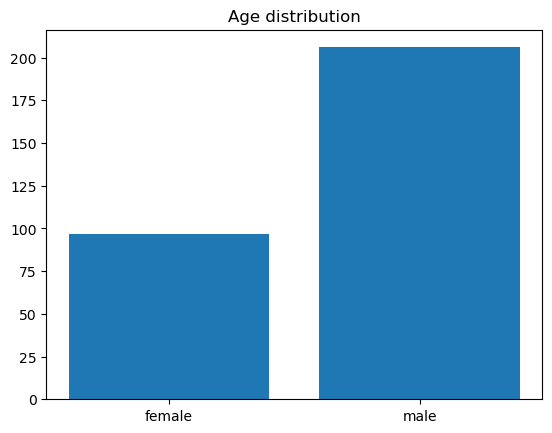

In [128]:
import matplotlib.pyplot as plt
import seaborn as sns

counts_male = len(X[X['sex'] == male])
counts_female = len(X[X['sex'] == female])

plt.bar([male, female], [counts_male, counts_female])
plt.xticks([0, 1],['female', 'male'])
plt.title('Age distribution')
plt.show()

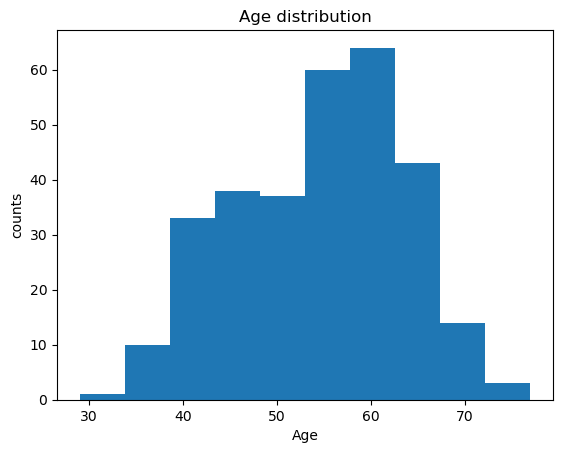

In [41]:
plt.hist(X['age'])
plt.xlabel('Age')
plt.ylabel('counts')
plt.title('Age distribution')
plt.show()

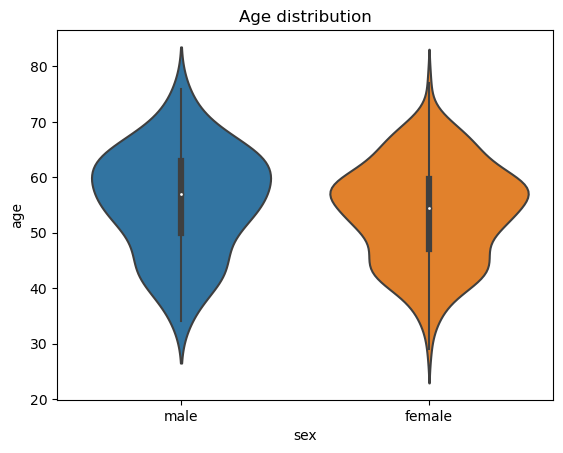

In [42]:
ax = sns.violinplot(X, x='sex', y='age')
ax.set_xticklabels(['male', 'female'])
plt.title('Age distribution')
plt.show()

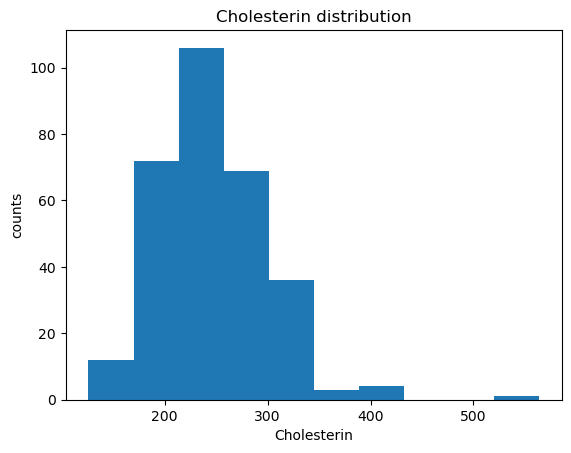

In [43]:
ax = plt.hist(X['chol'])
plt.xlabel('Cholesterin')
plt.ylabel('counts')
plt.title('Cholesterin distribution')
plt.show()

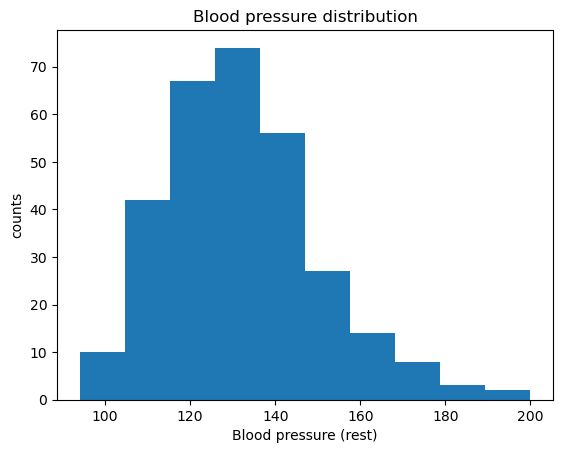

In [88]:
plt.hist(X['trestbps'])
plt.xlabel('Blood pressure (rest)')
plt.ylabel('counts')
plt.title('Blood pressure distribution')
plt.show()

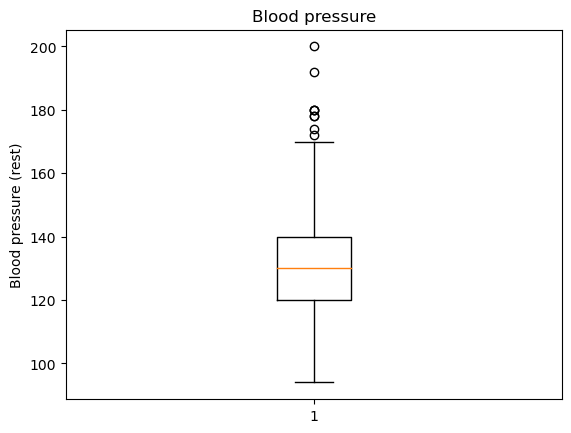

In [91]:
plt.boxplot(X['trestbps'])
plt.ylabel('Blood pressure (rest)')
plt.title('Blood pressure')
plt.show()

Text(0.5, 1.0, 'Chol / Age split by sex')

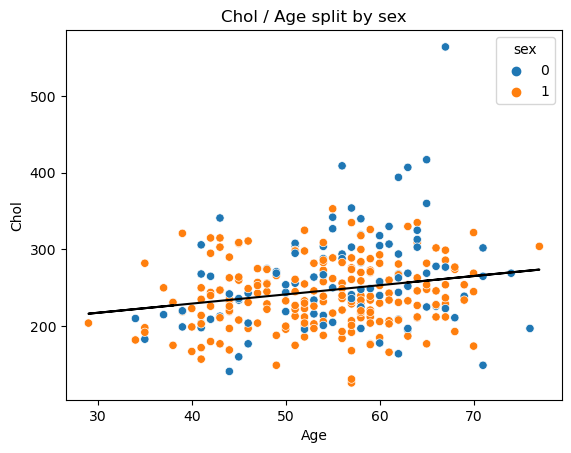

In [92]:
from sklearn.linear_model import LinearRegression
import numpy as np

model = LinearRegression()
x = np.array(X['age'])
x = x[:, np.newaxis]
reg = model.fit(x, X['chol'])
pred = reg.predict(x)

sick = np.array(y)[:,0] != 0

sns.scatterplot(X, x='age', y='chol', hue='sex')
plt.plot(x, pred, color='black')
plt.xlabel('Age')
plt.ylabel('Chol')
plt.title('Chol / Age split by sex')

Text(0.5, 1.0, 'Blood pressure / Age split by sex')

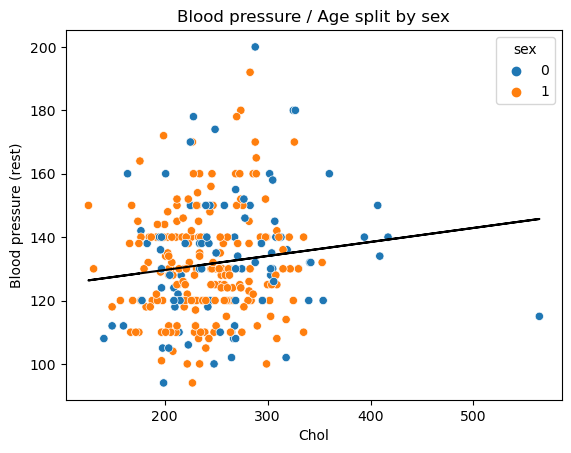

In [97]:
model = LinearRegression()
x = np.array(X['chol'])
x = x[:, np.newaxis]
reg = model.fit(x, X['trestbps'])
pred = reg.predict(x)

sick = np.array(y)[:,0] != 0

sns.scatterplot(X, x='chol', y='trestbps', hue='sex')
plt.plot(x, pred, color='black')
plt.xlabel('Chol')
plt.ylabel('Blood pressure (rest)')
plt.title('Blood pressure / Age split by sex')

<Axes: >

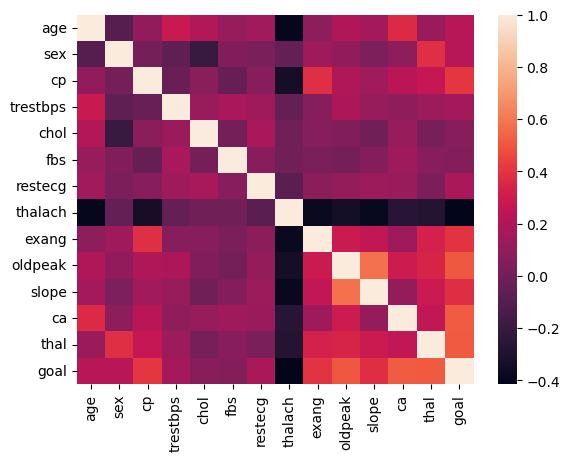

In [129]:
corr = df.corr()

sns.heatmap(corr)